In [1]:
import pandas as pd
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.theta import ThetaModel, ThetaParams
from kats.models.sarima import SARIMAModel, SARIMAParams
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import arima,holtwinters,linear_model,prophet,quadratic_model,sarima,theta
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('dataset.txt',sep=',',parse_dates=['date'])

In [3]:
main=df[df.location=='Azerbaijan']

In [4]:
main.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
6857,AZE,Asia,Azerbaijan,2021-07-02,336223.0,101.0,68.857,4977.0,2.0,1.429,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6858,AZE,Asia,Azerbaijan,2021-07-03,336318.0,95.0,74.571,4977.0,0.0,1.429,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6859,AZE,Asia,Azerbaijan,2021-07-04,336417.0,99.0,83.000,4978.0,1.0,1.429,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6860,AZE,Asia,Azerbaijan,2021-07-05,336479.0,62.0,86.429,4978.0,0.0,1.143,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6861,AZE,Asia,Azerbaijan,2021-07-06,336557.0,78.0,85.143,4978.0,0.0,0.714,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6862,AZE,Asia,Azerbaijan,2021-07-07,336684.0,127.0,91.000,4979.0,1.0,0.714,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6863,AZE,Asia,Azerbaijan,2021-07-08,336788.0,104.0,95.143,4980.0,1.0,0.714,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6864,AZE,Asia,Azerbaijan,2021-07-09,336962.0,174.0,105.571,4982.0,2.0,0.714,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6865,AZE,Asia,Azerbaijan,2021-07-10,337098.0,136.0,111.429,4984.0,2.0,1.000,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN
6866,AZE,Asia,Azerbaijan,2021-07-11,337254.0,156.0,119.571,4984.0,0.0,0.857,...,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.0,0.756,NaN


In [5]:
main=main[['date','new_cases','total_cases',
           'new_deaths','total_deaths','new_tests',
           'total_tests','new_vaccinations',
           'total_vaccinations','people_vaccinated']]

In [6]:
main.tail(10)

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,new_vaccinations,total_vaccinations,people_vaccinated
6857,2021-07-02,101.0,336223.0,2.0,4977.0,9851.0,3767982.0,73621.0,3670729.0,2290808.0
6858,2021-07-03,95.0,336318.0,0.0,4977.0,10428.0,3778410.0,69718.0,3740447.0,2321863.0
6859,2021-07-04,99.0,336417.0,1.0,4978.0,8679.0,3787089.0,52317.0,3792764.0,2345077.0
6860,2021-07-05,62.0,336479.0,0.0,4978.0,5951.0,3793040.0,769.0,3793533.0,2345371.0
6861,2021-07-06,78.0,336557.0,0.0,4978.0,9952.0,3802992.0,61922.0,3855455.0,2371796.0
6862,2021-07-07,127.0,336684.0,1.0,4979.0,10025.0,3813017.0,55169.0,3910624.0,2396007.0
6863,2021-07-08,104.0,336788.0,1.0,4980.0,8709.0,3821726.0,53478.0,3964102.0,2417173.0
6864,2021-07-09,174.0,336962.0,2.0,4982.0,NaN,NaN,51510.0,4015612.0,2437929.0
6865,2021-07-10,136.0,337098.0,2.0,4984.0,NaN,NaN,53606.0,4069218.0,2459102.0
6866,2021-07-11,156.0,337254.0,0.0,4984.0,NaN,NaN,38732.0,4107950.0,2474911.0


In [7]:
main.fillna(0,inplace=True)

In [8]:
main.isnull().sum()

date                  0
new_cases             0
total_cases           0
new_deaths            0
total_deaths          0
new_tests             0
total_tests           0
new_vaccinations      0
total_vaccinations    0
people_vaccinated     0
dtype: int64

In [9]:
main.reset_index(inplace=True)

In [10]:
main.drop('index',axis=1,inplace=True)

In [11]:
main.tail(10)

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,new_vaccinations,total_vaccinations,people_vaccinated
488,2021-07-02,101.0,336223.0,2.0,4977.0,9851.0,3767982.0,73621.0,3670729.0,2290808.0
489,2021-07-03,95.0,336318.0,0.0,4977.0,10428.0,3778410.0,69718.0,3740447.0,2321863.0
490,2021-07-04,99.0,336417.0,1.0,4978.0,8679.0,3787089.0,52317.0,3792764.0,2345077.0
491,2021-07-05,62.0,336479.0,0.0,4978.0,5951.0,3793040.0,769.0,3793533.0,2345371.0
492,2021-07-06,78.0,336557.0,0.0,4978.0,9952.0,3802992.0,61922.0,3855455.0,2371796.0
493,2021-07-07,127.0,336684.0,1.0,4979.0,10025.0,3813017.0,55169.0,3910624.0,2396007.0
494,2021-07-08,104.0,336788.0,1.0,4980.0,8709.0,3821726.0,53478.0,3964102.0,2417173.0
495,2021-07-09,174.0,336962.0,2.0,4982.0,0.0,0.0,51510.0,4015612.0,2437929.0
496,2021-07-10,136.0,337098.0,2.0,4984.0,0.0,0.0,53606.0,4069218.0,2459102.0
497,2021-07-11,156.0,337254.0,0.0,4984.0,0.0,0.0,38732.0,4107950.0,2474911.0


In [12]:
data=main[['date','new_cases']]

In [13]:
data.columns=['time','value']

In [14]:
data=TimeSeriesData(data)

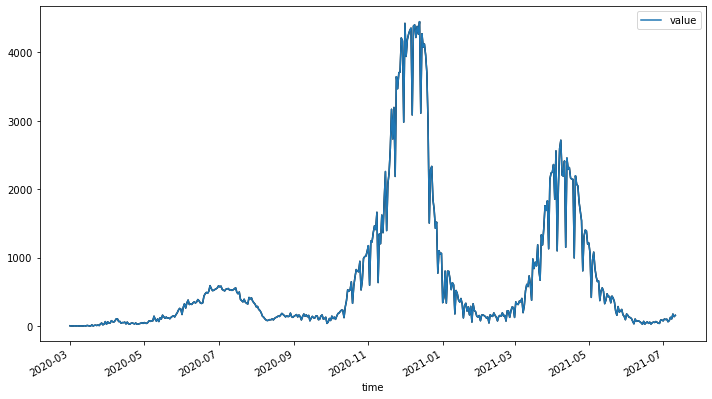

In [15]:
data.plot(cols=['value'])

In [16]:
parameters = ProphetParams(seasonality_mode='additive')
model = ProphetModel(data, parameters)
model.fit()
forecast = model.predict(steps=30, freq="d")
forecast.head(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,time,fcst,fcst_lower,fcst_upper
0,2021-07-12,160.138626,-885.649427,1228.817160
1,2021-07-13,418.509420,-711.830129,1384.322252
2,2021-07-14,417.400188,-676.374167,1541.114812
3,2021-07-15,421.277783,-770.590703,1516.086243
4,2021-07-16,398.696873,-722.972751,1544.290284
5,2021-07-17,389.118423,-732.354089,1450.208443
6,2021-07-18,407.921008,-749.516588,1467.960642
7,2021-07-19,128.521773,-1014.441300,1192.330396
8,2021-07-20,386.892568,-712.591175,1422.329886
9,2021-07-21,385.783335,-680.398952,1430.785128


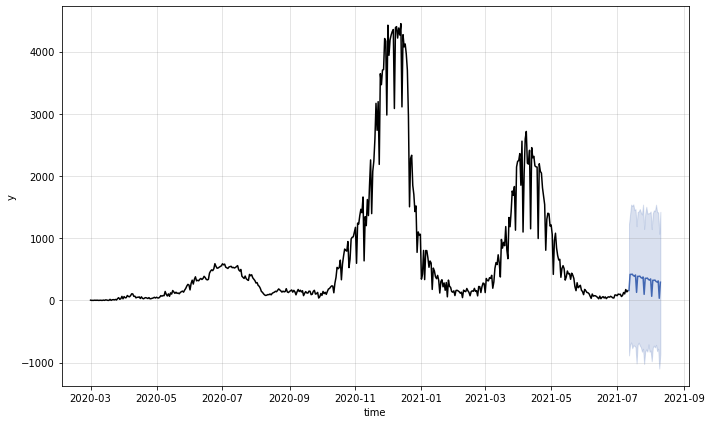

In [17]:
model.plot()

In [18]:
parameters = ThetaParams(m=1)
model = ThetaModel(data=data, params=parameters)
model.fit()
forecast = model.predict(steps=100, alpha=0.2)
forecast.head(10)

,time,fcst,fcst_lower,fcst_upper
498,2021-07-12,149.046138,-177.204827,475.297102
499,2021-07-13,149.889049,-218.014206,517.792305
500,2021-07-14,150.731961,-254.565360,556.029282
501,2021-07-15,151.574873,-287.946494,591.096240
502,2021-07-16,152.417785,-318.848748,623.684318
503,2021-07-17,153.260697,-347.743553,654.264947
504,2021-07-18,154.103608,-374.969517,683.176734
505,2021-07-19,154.946520,-400.779568,710.672608
506,2021-07-20,155.789432,-425.368549,736.947413
507,2021-07-21,156.632344,-448.890333,762.155020


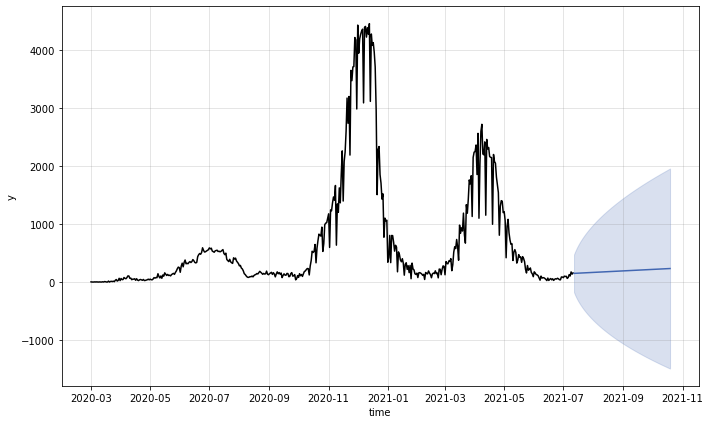

In [19]:
model.plot()

In [20]:
parameters = HoltWintersParams(
            trend="add",
            damped=False,
            seasonal="add",
            seasonal_periods=2,
        )
model = HoltWintersModel(
    data=data, 
    params=parameters)
model.fit()
forecast = model.predict(steps=30, alpha = 0.2)
forecast.head(10)

,time,fcst,fcst_lower,fcst_upper
498,2021-07-12,161.057756,129.038019,193.077493
499,2021-07-13,168.279073,83.245276,253.312870
500,2021-07-14,181.210320,43.162464,319.258176
501,2021-07-15,188.431638,-2.630279,379.493554
502,2021-07-16,201.362884,-42.713092,445.438860
503,2021-07-17,208.584202,-88.505834,505.674238
504,2021-07-18,221.515449,-128.588647,571.619544
505,2021-07-19,228.736766,-174.381389,631.854921
506,2021-07-20,241.668013,-214.464202,697.800228
507,2021-07-21,248.889331,-260.256944,758.035605


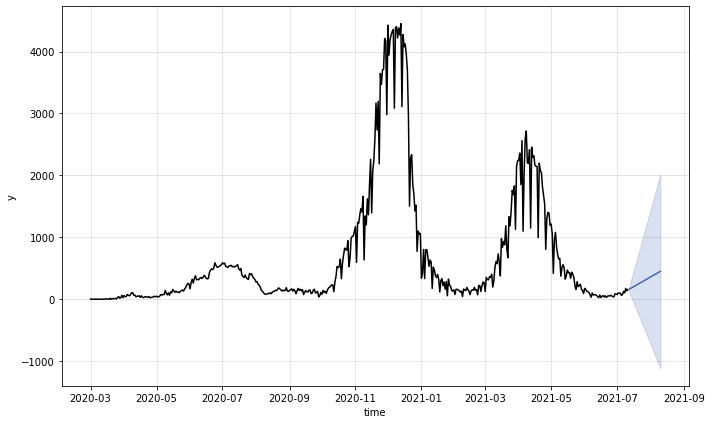

In [21]:
model.plot()

In [22]:
parameters = SARIMAParams(
    p = 2, 
    d=1, 
    q=1, 
    trend = 'ct', 
    seasonal_order=(1,0,1,12)
    )
model = SARIMAModel(data=data, params=parameters)
model.fit()
forecast = model.predict(
    steps=30, 
    freq="d"
    )
forecast.head(10)

,time,fcst,fcst_lower,fcst_upper
498,2021-07-12,206.413590,-259.881441,672.708620
499,2021-07-13,88.320393,-434.422200,611.062985
500,2021-07-14,170.593741,-426.194733,767.382215
501,2021-07-15,76.694414,-613.949242,767.338070
502,2021-07-16,55.368848,-674.489063,785.226759
503,2021-07-17,133.123217,-678.833623,945.080056
504,2021-07-18,81.341653,-769.494780,932.178085
505,2021-07-19,200.300559,-710.837321,1111.438439
506,2021-07-20,148.627664,-806.014747,1103.270075
507,2021-07-21,17.011996,-983.859829,1017.883821


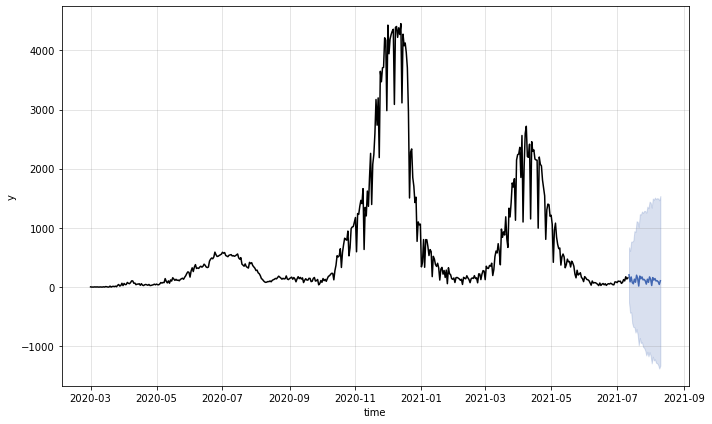

In [23]:
model.plot()

In [24]:
parameters = EnsembleParams(
            [
                BaseModelParams("prophet", prophet.ProphetParams()),
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    )
                ),
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1))

            ]
        )

KatsEnsembleParam = {
    "models": parameters,
    "aggregation": "median",
    "seasonality_length": 1,
    "decomposition_method": "additive",
}

model = KatsEnsemble(
    data=data, 
    params=KatsEnsembleParam
    )

model.fit()

forecast = model.predict(steps=30)

model.aggregate().head(10)

,time,fcst,fcst_lower,fcst_upper
0,2021-07-12,339.328054,-706.101400,1503.969684
1,2021-07-13,332.515005,-673.085402,1463.023564
2,2021-07-14,325.567700,-699.650862,1444.915861
3,2021-07-15,318.757274,-702.660975,1526.848868
4,2021-07-16,311.817952,-699.059047,1398.090310
5,2021-07-17,304.971157,-754.718770,1447.617262
6,2021-07-18,299.970835,-695.384119,1433.601777
7,2021-07-19,294.721011,-708.106509,1413.160574
8,2021-07-20,287.769840,-723.015638,1411.212343
9,2021-07-21,280.684412,-716.476276,1437.822566


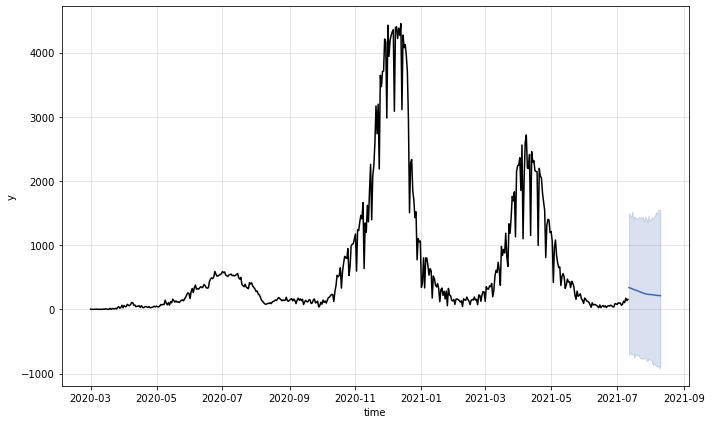

In [26]:
model.plot()